In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("AirPassengers.csv")
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [3]:
df.shape

(144, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [5]:
# convert month column datatype to datetime
df['Month'] = pd.to_datetime(df['Month'])
df['Month'].dtype

dtype('<M8[ns]')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [7]:
df.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [8]:
df.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [9]:
df.plot()                  # this will plot Month also as data whereas we need datetime column as index and not as a feature

ValueError: view limit minimum -35683.05 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

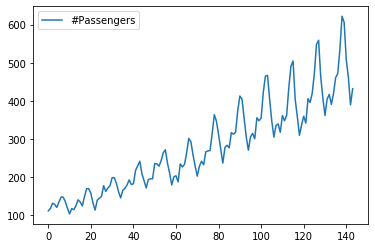

In [10]:
sns.lineplot(data=df)

In [11]:
df.set_index("Month", inplace=True)
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


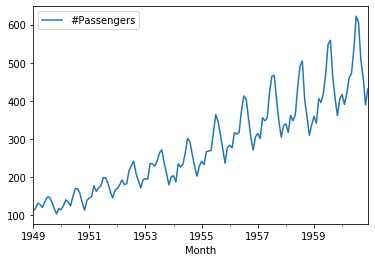

In [12]:
df.plot()

In [13]:
# To see trend, seasonality and residue separately - Seasonal Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 1440x1080 with 0 Axes>

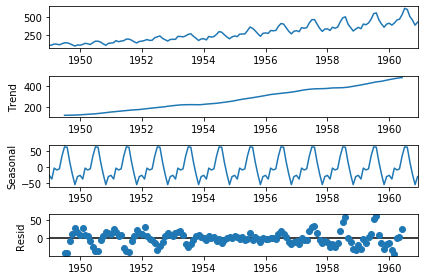

In [18]:
decomposed = seasonal_decompose(df)
print(decomposed.plot())

In [19]:
# Checking for Stationarity - Augmented Dickey Fuller Test

# if p < 0.05 - Data is Stationary
# p > 0.5 - Data is Non-Stationary 

from statsmodels.tsa.stattools import adfuller

In [21]:
test_result = adfuller(df)
test_result

(0.8153688792060468,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [22]:
p_val = test_result[1]
p_val

0.991880243437641

In [24]:
if p_val < 0.05:
    print("Data is Stationary")
else:
    print("Data is Non-Stationary")

Data is Non-Stationary


Text(0.5, 1.0, 'Rolling Mean & Standard Deviation (Logrithmic Scale)')

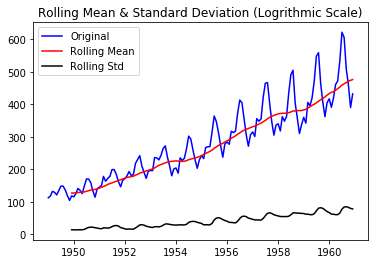

In [25]:
# To convert data into Stationary

mean = df.rolling(window=12).mean()
std = df.rolling(window=12).std()

plt.plot(df, color='blue', label='Original')
plt.plot(mean, color='red', label='Rolling Mean')
plt.plot(std, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation (Logrithmic Scale)')

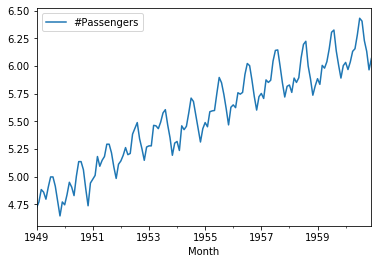

In [28]:
# Logrithmic Commutation to make the Time Series Stationary
first_log = np.log(df)
first_log = first_log.dropna()
first_log.plot()

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation (Logrithmic Scale)')

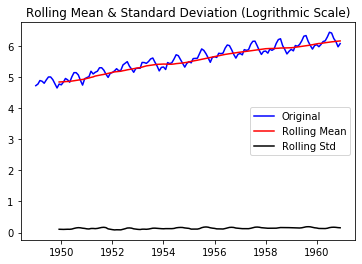

In [29]:
mean_log = first_log.rolling(window=12).mean()
std_log = first_log.rolling(window=12).std()

plt.plot(first_log, color='blue', label='Original')
plt.plot(mean_log, color='red', label='Rolling Mean')
plt.plot(std_log, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation (Logrithmic Scale)')

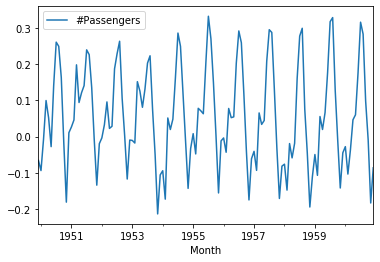

In [30]:
# Differencing to make the data Stationary
new_data = first_log - mean_log
new_data = new_data.dropna()
new_data.plot()

In [32]:
# Check if the data became Stationary or not
result = adfuller(new_data)
result

(-3.162907991300854,
 0.0222346300012441,
 13,
 119,
 {'1%': -3.4865346059036564,
  '5%': -2.8861509858476264,
  '10%': -2.579896092790057},
 -436.63269481747125)

In [33]:
p_value = result[1]
p_value

0.0222346300012441

In [34]:
if p_value < 0.05:
    print("Data is Stationary")
else:
    print("Data is Non-Stationary")

Data is Stationary


In [35]:
# Build Model

In [36]:
# Split the data into Train and Test
new_data.shape

(133, 1)

In [37]:
train = new_data[:120]['#Passengers']
test = new_data[120:]['#Passengers']

In [38]:
train.shape

(120,)

In [39]:
test.shape

(13,)

In [40]:
# ARIMA model
from statsmodels.tsa.arima.model import ARIMA

In [41]:
A_model = ARIMA(train, order=(6,1,6))

c:\Users\Joyita\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [42]:
A_model = A_model.fit()

c:\Users\Joyita\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [43]:
new_data['Arima_Prediction'] = A_model.predict(start=len(train), end=len(train)+len(test)-1)

In [44]:
new_data.tail(10)

,#Passengers,Arima_Prediction
Month,,
1960-03-01,-0.036530,-0.030427
1960-04-01,0.046332,0.060396
1960-05-01,0.060186,0.122278
1960-06-01,0.175033,0.179761
1960-07-01,0.315151,0.197124
1960-08-01,0.282363,0.171255
1960-09-01,0.098235,0.120004
1960-10-01,-0.009230,0.045709
1960-11-01,-0.182690,-0.029838


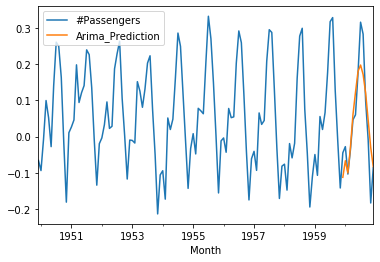

In [45]:
new_data[['#Passengers', 'Arima_Prediction']].plot()

In [46]:
# SARIMAX model
# since Arima is not giving exact prediction, and doesn't capture seasonality properly
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [47]:
S_model = SARIMAX(train, order=(6,1,6), seasonal_order=(6,1,6,12))

c:\Users\Joyita\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [48]:
S_model = S_model.fit()

c:\Users\Joyita\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
c:\Users\Joyita\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [49]:
new_data['Sarima_Prediction'] = S_model.predict(start=len(train), end=len(train)+len(test)-1)
new_data.tail(10)

,#Passengers,Arima_Prediction,Sarima_Prediction
Month,,,
1960-03-01,-0.036530,-0.030427,0.034684
1960-04-01,0.046332,0.060396,0.011022
1960-05-01,0.060186,0.122278,0.054435
1960-06-01,0.175033,0.179761,0.198340
1960-07-01,0.315151,0.197124,0.318575
1960-08-01,0.282363,0.171255,0.314326
1960-09-01,0.098235,0.120004,0.118601
1960-10-01,-0.009230,0.045709,-0.012265
1960-11-01,-0.182690,-0.029838,-0.150065


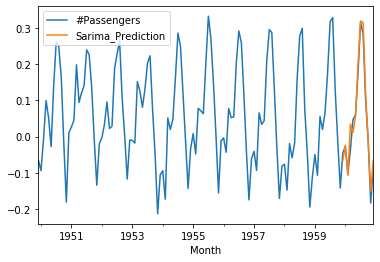

In [50]:
new_data[['#Passengers', 'Sarima_Prediction']].plot()

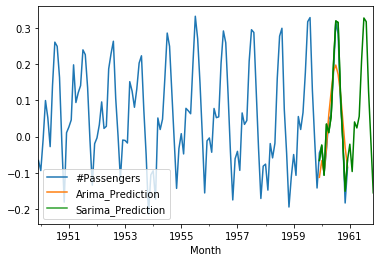

In [54]:
future = S_model.forecast(steps=24)
new_data.plot()
future.plot(color='green')

In [55]:
# Additional for p and q values
from sklearn.metrics import *
import itertools
p=range(0,7)
d=range(1,2)
q=range(0,7)
pdq=list(itertools.product(p,d,q))
rmse = []
order =[]
for i in pdq:
    model = ARIMA(train, order = i)
    model_fit = model.fit()
    pred = model_fit.predict(start = len(train), end= len(train)+len(test)-1)
    error = np.sqrt(mean_squared_error(test,pred))
    order.append(i)
    rmse.append(error)

results = pd.DataFrame(index = order, data = rmse, columns=['RMSE'])

c:\Users\Joyita\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\Users\Joyita\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\Users\Joyita\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\Users\Joyita\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\Users\Joyita\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\Us

In [56]:
results.sort_values(by='RMSE',ascending=True)

,RMSE
"(6, 1, 6)",0.069798
"(4, 1, 6)",0.072089
"(5, 1, 6)",0.075102
"(6, 1, 1)",0.097481
"(4, 1, 3)",0.113252
"(3, 1, 3)",0.113942
"(6, 1, 3)",0.120989
"(6, 1, 5)",0.122105
"(4, 1, 5)",0.123097
"(6, 1, 2)",0.127570
